# 3 Bracketing methods

In [2]:
# some necessary preparation
using Plots
using Printf

f_test(x) = x^2 - 3*x 

f_test (generic function with 1 method)

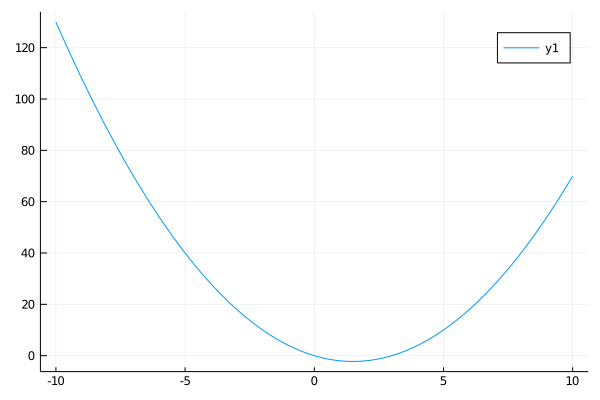

In [3]:
plot(f_test, -10:0.1:10)

## 3.1 Initial bracket interval

In [4]:
function bracket_minimum(f, x=0.0; s=1e-2, k=2.0) 
    a, ya = x, f(x)
    b, yb = a + s, f(a + s) 
    if yb > ya
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    end
    while true
        c, yc = b + s, f(b + s) 
        if yc > yb
            return a < c ? (a, c) : (c, a) 
        end
        a, ya, b, yb = b, yb, c, yc
        s *= k 
    end
end

bracket_minimum (generic function with 2 methods)

In [5]:
bracket_minimum(f_test, 1.0)

(1.32, 2.2800000000000002)

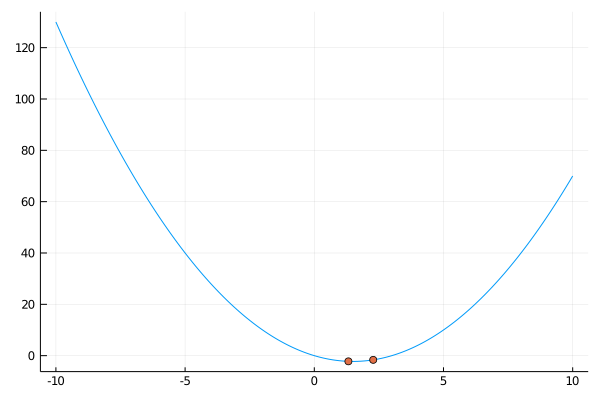

In [11]:
plot(f_test, -10:0.1:10)
scatter!([1.32, 2.28], [f_test(1.32), f_test(2.28)], legend=false)

In [12]:
function bisection_search(f, a, b, n) 
    ρ = 1/2
    d = ρ * b + (1 - ρ)*a 
    yd = f(d)
    for i = 1 : n-1
        c = ρ*a + (1 - ρ)*b 
        yc = f(c)
        if yc < yd
            b, d, yd = d, c, yc
        else
            a, b = b, c 
        end
        @printf("%d %6.3f %6.3f %6.3f\n", i, a, b, abs(a-b))
    end
return a < b ? (a, b) : (b, a) 
end

bisection_search (generic function with 1 method)

In [13]:
bisection_search(f_test, -1, 2, 10) 

1  2.000  0.500  1.500
2  2.000  0.500  1.500
3  0.500  1.250  0.750
4  1.250  0.875  0.375
5  0.875  1.063  0.188
6  1.063  0.969  0.094
7  0.969  1.016  0.047
8  1.016  0.992  0.023
9  0.992  1.004  0.012


(0.9921875, 1.00390625)

## 3.2 Fibonaci search

In [14]:
# Fibonaci sequence
f(k) = 1/√5* ( ((1+√5)/2)^(k+1) - ((1-√5)/2)^(k+1) )
for i in 1:10
    println(i, ":  ", f(i))
end

1:  1.0
2:  2.0
3:  3.0000000000000004
4:  5.000000000000001
5:  8.000000000000002
6:  13.000000000000002
7:  21.000000000000004
8:  34.00000000000001
9:  55.000000000000014
10:  89.00000000000003


In [15]:
function fibonacci_search(f, a, b, n; ε=0.01) 
    ϕ = (1+√5)/2
    s = (1-√5)/(1+√5)
    ρ = 1 / (ϕ*(1-s^(n+1))/(1-s^n))
    d = ρ*b + (1-ρ)*a
    yd = f(d)
    for i in 1 : n-1
        if i == n-1
            c = ε*a + (1-ε)*d 
        else
            c = ρ*a + (1-ρ)*b 
        end
        yc = f(c) 
        if yc < yd
            b, d, yd = d, c, yc
        else
            a, b = b, c 
        end
        ρ = 1 / (ϕ*(1-s^(n-i+1))/(1-s^(n-i))) 
        @printf("%d %6.3f %6.3f %6.3f\n", i, a, b, abs(a-b))
    end
return a < b ? (a, b) : (b, a) 
end

fibonacci_search (generic function with 1 method)

In [16]:
fibonacci_search(f_test, -1, 2, 10; ε=0.01) 

1  2.000  0.146  1.854
2  2.000  0.854  1.146
3  2.000  1.292  0.708
4  1.292  1.730  0.438
5  1.292  1.562  0.270
6  1.562  1.393  0.169
7  1.562  1.461  0.101
8  1.461  1.528  0.067
9  1.528  1.494  0.034


(1.4940449438202246, 1.5280898876404494)

## 3.3 Golden ratio search

In [17]:
function golden_section_search(f, a, b, n) 
    ϕ = (1+√5)/2
    ρ = ϕ-1
    d = ρ * b + (1 - ρ)*a 
    yd = f(d)
    for i = 1 : n-1
        c = ρ*a + (1 - ρ)*b 
        yc = f(c)
        if yc < yd
            b, d, yd = d, c, yc
        else
            a, b = b, c 
        end
        @printf("%d %6.3f %6.3f %6.3f\n", i, a, b, abs(a-b))
    end
return a < b ? (a, b) : (b, a) 
end

golden_section_search (generic function with 1 method)

In [18]:
golden_section_search(f_test, -1, 2, 10) 

1  2.000  0.146  1.854
2  2.000  0.854  1.146
3  2.000  1.292  0.708
4  1.292  1.729  0.438
5  1.292  1.562  0.271
6  1.562  1.395  0.167
7  1.562  1.459  0.103
8  1.459  1.523  0.064
9  1.523  1.483  0.039


(1.4833721937705047, 1.5228390462597792)

## 3.4 Bisection search